# In this notebook, we are going to learn three widely used clustering models.

<font color='red'>Question:</font> What are supervised learning and unsupervised learning?

### Supervised learning relies on labelled input and output training data. while unsupervised learning processes unlabelled or raw data.

<font color='red'>Question:</font> Why unsupervised learning is important?

### It can identify previously unknown patterns in data. It can be easier, faster, and less costly to use than supervised learning as unsupervised learning does not require the manual work to label data that supervised learning requires.

# 1. *k*-Means

## 1.1 Modeling

<font color='red'>Assignment:</font> Load the data in '../data/clustering.csv' into a DataFrame **df**, and plot the data in **df**.

In [1]:
import pandas as pd
df =  pd.read_csv('clustering.csv')
df.head()

,x1,x2
0,3.101246,6.183914
1,1.083915,12.311124
2,-4.100572,50.639475
3,-3.350454,104.422200
4,-4.256006,52.260368


<font color='red'>Question:</font> How many clusters do you think there are?

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

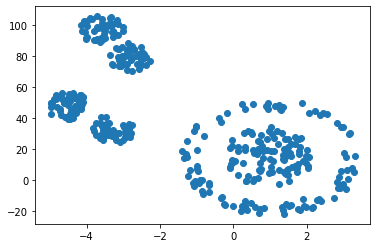

In [3]:
plt.scatter(df['x1'], df['x2'])

### from the plot above, there should be 5 or 6 clusters.

<font color='red'>Assignment:</font> Train a **KMeans** model with the data in **df**. Set **n_cluster** the number of clusters which you think is reasonable.

In [5]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans(n_clusters = 6)
km.fit(df)

KMeans(n_clusters=6)

<font color='red'>Question:</font> What information does the attribute **label_** of **KMeans** provide?

In [9]:
km.labels_

array([2, 2, 0, 1, 0, 2, 5, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 0, 0, 5, 5, 4,
       1, 5, 4, 5, 5, 0, 5, 3, 2, 5, 2, 0, 3, 0, 2, 0, 3, 4, 3, 4, 2, 5,
       1, 3, 0, 0, 1, 2, 4, 5, 1, 5, 1, 2, 1, 5, 3, 2, 2, 2, 3, 2, 2, 2,
       5, 2, 0, 5, 0, 5, 3, 2, 3, 1, 5, 5, 3, 5, 0, 2, 3, 1, 3, 2, 1, 3,
       2, 0, 1, 3, 3, 3, 5, 1, 5, 5, 4, 4, 0, 0, 3, 0, 3, 0, 0, 3, 0, 5,
       1, 3, 2, 4, 5, 0, 3, 1, 2, 0, 2, 1, 4, 4, 3, 2, 2, 5, 3, 1, 0, 4,
       2, 1, 2, 5, 2, 5, 5, 3, 2, 5, 0, 2, 4, 0, 2, 1, 2, 3, 2, 0, 5, 0,
       5, 5, 3, 5, 2, 5, 4, 0, 2, 4, 0, 0, 5, 1, 4, 5, 1, 0, 5, 5, 0, 5,
       3, 0, 0, 2, 1, 4, 5, 0, 4, 0, 2, 4, 5, 0, 5, 5, 1, 2, 5, 4, 3, 4,
       3, 1, 4, 2, 0, 2, 3, 2, 4, 1, 1, 5, 3, 2, 3, 4, 1, 1, 4, 5, 2, 5,
       3, 2, 0, 2, 4, 4, 2, 2, 5, 4, 0, 2, 5, 4, 5, 2, 2, 2, 5, 2, 5, 0,
       2, 0, 2, 2, 3, 4, 1, 1, 5, 3, 5, 3, 0, 4, 2, 4, 4, 2, 2, 5, 4, 4,
       3, 1, 5, 1, 0, 5, 2, 2, 3, 3, 0, 3, 2, 5, 5, 2, 2, 4, 4, 2, 5, 5,
       1, 2, 4, 0, 2, 4, 4, 2, 0, 5, 5, 2, 4, 3, 0,

### It provides label for each data point.

<font color='red'>Assignment:</font> Visualize the clustering results. **Hint:** use **plt.scatter(x, y, c=z)**.

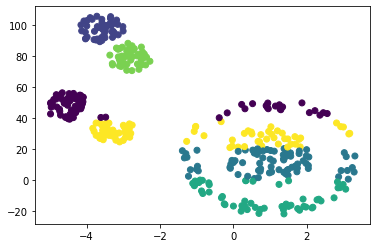

In [10]:
plt.scatter(df['x1'], df['x2'], c=km.labels_)

<font color='red'>Question:</font> Do you think the result is reasonable? What is the reason? How can you solve it? **Hint:** Re-plot the clustering results with **plt.axis('equal')**.

(-5.397438252729568,
 3.7217075241479174,
 -28.269319689435598,
 112.25222492450114)

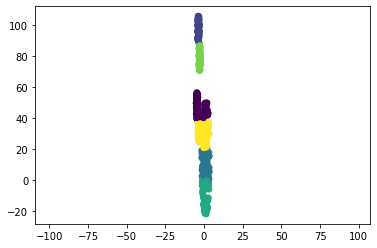

In [11]:
plt.scatter(df['x1'], df['x2'], c=km.labels_)
plt.axis('equal')

### It's not reasonable, becasue the scale of x and y axis are different, KMeans group clusters largely based on y axis which has larger range.
### The solution might be scaling the data to get the same range for both features.

<font color='red'>Assignment:</font> Rescale the data in **df** and assign them to a variable X. Re-do the above steps with X.

In [12]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
#X[:4]

In [17]:
km_scale = KMeans(n_clusters=6)
km_scale.fit(X)

KMeans(n_clusters=6)

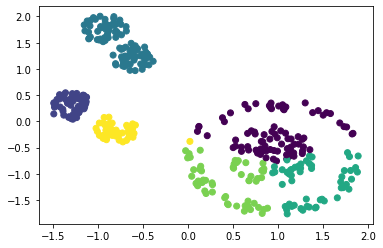

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=km_scale.labels_)

<font color='red'>Question:</font> Do you think it is more reasonable now? Can you describe how **KMeans** works? How **centroids** are initialized and updated? How does the model determine which cluster a data point belongs to?

### It's more reasonable now. 
### KMeans add k new points to the data we have. Each one of them is called a Centroid. It will be going around to center itself in the middle of one of the k clusters. Once those Centroids stop moving, the clustering algorithm stops.

In [19]:
df['cluster'] = km_scale.fit_predict(X)
df.head()

,x1,x2,cluster
0,3.101246,6.183914,5
1,1.083915,12.311124,0
2,-4.100572,50.639475,1
3,-3.350454,104.422200,2
4,-4.256006,52.260368,1


<font color='red'>Question:</font> What are the important hyperparameters for **KMeans**? How do they affect results?

### n_clusters: the number of clusters with same number of centriods to generate. More clusters, less data points in each cluster.
### n_init: the number of times the algorithm will initialize the centroids. Increasing this value will scan the entire feature space more deeply.
### tol: the amount we are willing to tolerate a large change in inertia, or change of loss. If the change of inertia is less than tol, then the algorithm will stop iterating even if it has completed fewer than max_iter rounds. Therefore, keep it at a low value to scan the entire feature space.
### max_iter: the maximum number of iteration for each run in n_init. Within each run, data points are assigned to different clusters and loss is calculated for max_iter times. If max_iter is kept at a higher number, it will be guanranteed that the entire feature space is explored, but it also comes at a cost of diminishing returns.
### The other hyperparameters are kept as default to keep high computing efficiency.

## 1.2 Elbow Method

<font color='red'>Question:</font> What information does attribute **inertia_** of **KMeans** provide?

### inertia_ of KMeans provide sum of squared distances of samples to their closest cluster center, weighted by the sample weight if provided.

<font color='red'>Assignment:</font> Plot **inertia_** value versus **n_clusters**.

In [22]:
inert = []
for n in range(1,20):
    km_elbow = KMeans(n_clusters=n)
    km_elbow.fit(X)
    inert.append(km_elbow.inertia_)    

C:\Users\yong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
len(inert)

19

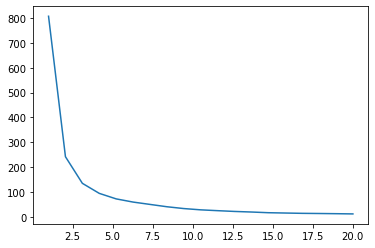

In [30]:
plt.plot(np.linspace(1,20, 19), inert)

<font color='red'>Question:</font> How many clusters (or which **k**) should we choose here? Is it consistent with what you found in the figure?

### 5 or 6 clusters we should choose here. Yes.

<font color='red'>Question:</font> What is **Elbow Method**? Does it always work?

### It's a graphical representation of finding the optimal number of clusters in K-means clustering. It can also be used in hyperparameter tuning for other machine learning algorithm.
### It might not always work. In reality, determining how many clusters we need with elbow method is only an initial guess. It's usually not enough to just run elbow method to determine the n_clusters. In general, we have to explore the data and get subject experts' opinion on how many clusters there should be.

# 2. Hierarchical Clustering

## 2.1 Modeling

<font color='red'>Assignment:</font> Train an **AgglomerativeClustering** model with **X**.

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
ac = AgglomerativeClustering(n_clusters=6)
ac.fit(X)

AgglomerativeClustering(n_clusters=6)

<font color='red'>Assignment:</font> Visualize the clustering results.

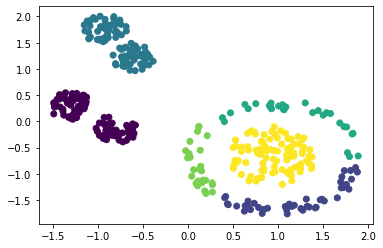

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=ac.labels_)

<font color='red'>Question:</font> How does hierarchecial clustering work?

### Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together.

<font color='red'>Question:</font> What are the important hyperparameters for **AgglomerativeClustering**? How do they affect results?

### n_clusters: same as above
### linkage: it determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
###          1. ward: minimizes the variance of the clusters being merged.
###          2. average: use the average of the distances of each observation of the two sets.
###          3. complete or maximum: use the maximum distances between all observations of the two sets.
###          4. single: use the minimum of the distances between all observations of the two sets.
### distance_threshold: more than or equal to this threshold clusters will not be merged.

### ward and average linkage need more computing than single and complete linkage.

## 2.2 Dendrogram

**Example:** Plot dendrogram of hierarchical clustering results. Here we use **linkage** in **scipy** to reproduce the results of **AgglomerativeClustering** model.

Text(0, 0.5, 'distance')

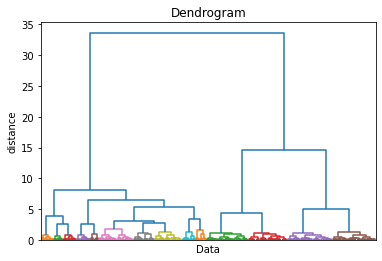

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, 'ward')
dendrogram(linkage_matrix, color_threshold=2.0)
plt.title('Dendrogram')
plt.xlabel('Data')
plt.xticks([])
plt.ylabel('distance')

# 3. DBSCAN

<font color='red'>Assignment:</font> Train a **DBSCAN** model with **X**.

In [35]:
from sklearn.cluster import DBSCAN

In [36]:
dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN()

<font color='red'>Assignment:</font> Visualize the clustering results.

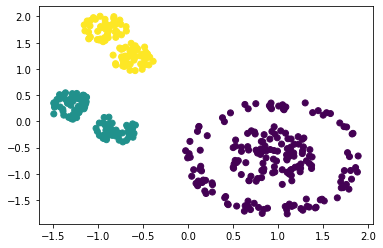

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)

<font color='red'>Assignment:</font> Tune hyperparameters to make the clustering results more reasonable.

In [48]:
labels = []
lst = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in lst:
    dbscan_t = DBSCAN(eps=i)
    dbscan_t.fit(X)
    labels.append(dbscan_t.labels_)

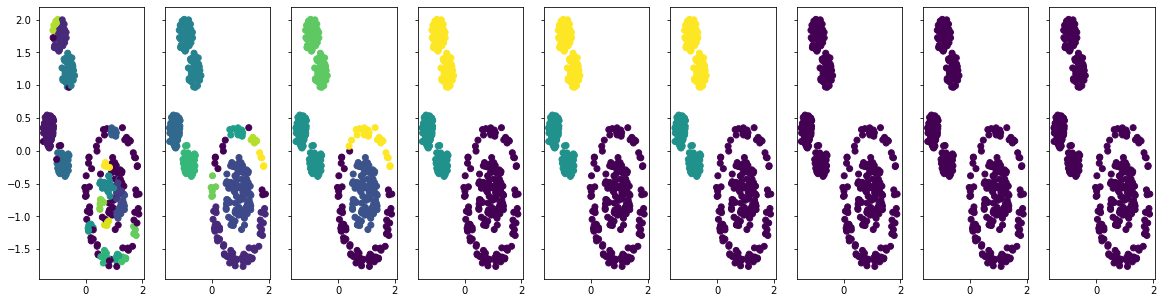

In [52]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=9, sharey=True)
for i in range(9):
    
    ax[i].scatter(X[:,0], X[:,1], c=labels[i])

<font color='red'>Question:</font> How does **DBSCAN** work?

### Based on a set of points, DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points

<font color='red'>Question:</font> What are the important hyperparameters for **DBSCAN**? How do they affect results?

### eps: specifies how close points should be to each other to be considered a part of a cluster. The higher the eps, the lower the number of the clusters. If the eps is too small, a large part of the data will not be clustered, and considered as outliers.
### min_samples: The minimum number of points to form a dense region. In general, it can be derived from a number of dimensions (D) in the data. min_samples >=D+1. The larger the dataset, the larger the min_samples should be chosen. 

<font color='red'>Question:</font> Do we need to set the number of clusters in **DBSCAN**? Why or why not?

### No,because hyperparameter 'eps' can be tuned to get the reasonable n_clusters.